In [5]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package              Version
-------------------- ---------
anyio                3.5.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
Babel                2.9.1
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
brotlipy             0.7.0
certifi              2022.9.24
cffi                 1.15.1
charset-normalizer   2.0.4
colorama             0.4.5
cryptography         37.0.1
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.16.2
idna                 3.3
ipykernel            6.15.2
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.1
Jinja2               3.0.3
json5                0.9.6
jsonschema           4.16.0
jupyter              1.0.0
jupyter_client       7.3.5
jupyter-console      6.4.3
jupyter_core         4.11.1
jupyter-ser

In [9]:
import tensorflow as tf
import os

In [16]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
import cv2
import imghdr

In [19]:
data_dir = 'data'

In [20]:
image_exts = ['jpeg','jpg','bmp','png']

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list data\Parasitized\Thumbs.db
Image not in ext list data\Uninfected\Thumbs.db


In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 27558 files belonging to 2 classes.


In [43]:
data_iterator = data.as_numpy_iterator()

In [41]:
#Get another batch from the iterator
batch = data_iterator.next()

In [39]:
#Class 1 Uninfected
#Class 0 Parasitized
batch[0]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

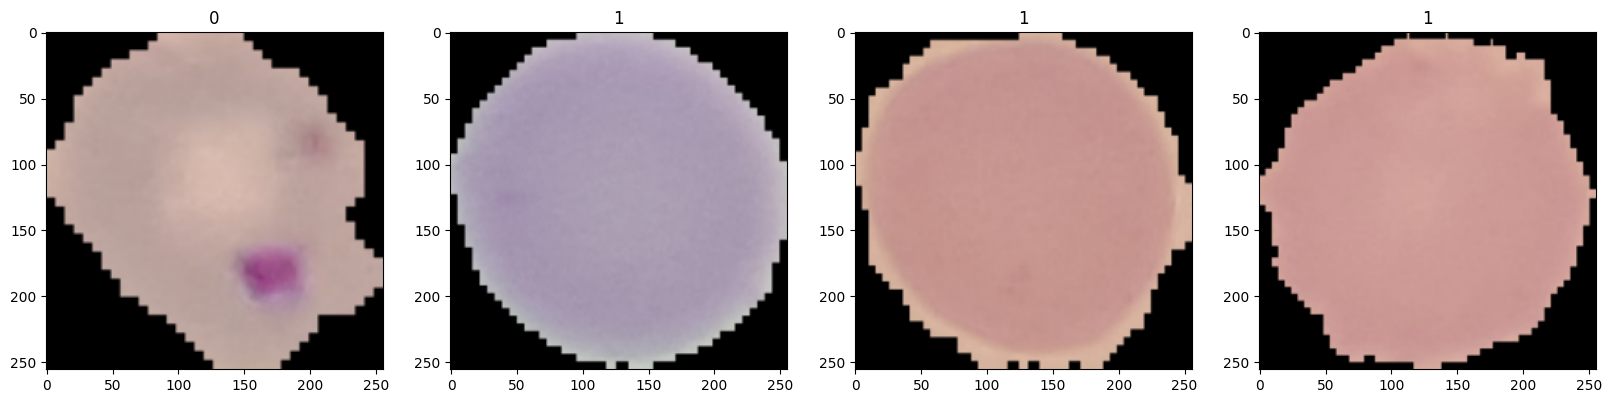

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])